In [1]:
import tensorflow as tf
import numpy as np

In [27]:
# We'll attempt to simulate the power method.
initial = tf.constant([1, 0, 0], dtype=tf.float32)
edges = tf.constant([[0, 1], [1, 2], [0, 2]], dtype=tf.int64)
edge_weights = tf.ones(edges.shape[0], dtype=tf.float32)
adjacency_matrix = tf.sparse.SparseTensor(
    indices=edges, values=edge_weights, dense_shape=[initial.shape[0], initial.shape[0]]
)

# Transpose the adjacency matrix to get the correct direction for PageRank
transition_matrix = adjacency_matrix / tf.sparse.reduce_sum(adjacency_matrix, axis=1, keepdims=True)
transition_matrix = tf.sparse.transpose(transition_matrix)
print("Transition matrix:\n", tf.sparse.to_dense(transition_matrix).numpy())
num_nodes = initial.shape[0]
smoothing = 0.15


def step(y_prev, adj):
    y_prev = tf.expand_dims(y_prev, axis=1)
    print(tf.sparse.to_dense(adj), y_prev)
    y_next = tf.sparse.sparse_dense_matmul(adj, y_prev) * (1 - smoothing) + smoothing / num_nodes
    y_next = tf.squeeze(y_next, axis=1)
    # y_next = y_next / tf.reduce_sum(y_next) # It should already sum to 1
    return y_next


y = initial
norms = [tf.reduce_sum(y)]
for _ in range(1000):
    y = step(y, transition_matrix)
    norms.append(tf.reduce_sum(y))

print("Final PageRank:", y.numpy())

Transition matrix:
 [[0.  0.  0. ]
 [0.5 0.  0. ]
 [0.5 1.  0. ]]
tf.Tensor(
[[0.  0.  0. ]
 [0.5 0.  0. ]
 [0.5 1.  0. ]], shape=(3, 3), dtype=float32) tf.Tensor(
[[1.]
 [0.]
 [0.]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.  0.  0. ]
 [0.5 0.  0. ]
 [0.5 1.  0. ]], shape=(3, 3), dtype=float32) tf.Tensor(
[[0.05      ]
 [0.47500002]
 [0.47500002]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.  0.  0. ]
 [0.5 0.  0. ]
 [0.5 1.  0. ]], shape=(3, 3), dtype=float32) tf.Tensor(
[[0.05      ]
 [0.07125   ]
 [0.47500002]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.  0.  0. ]
 [0.5 0.  0. ]
 [0.5 1.  0. ]], shape=(3, 3), dtype=float32) tf.Tensor(
[[0.05     ]
 [0.07125  ]
 [0.1318125]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.  0.  0. ]
 [0.5 0.  0. ]
 [0.5 1.  0. ]], shape=(3, 3), dtype=float32) tf.Tensor(
[[0.05     ]
 [0.07125  ]
 [0.1318125]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.  0.  0. ]
 [0.5 0.  0. ]
 [0.5 1.  0. ]], shape=(3, 3), dtype=float32) tf.Tensor(
[[0.05     

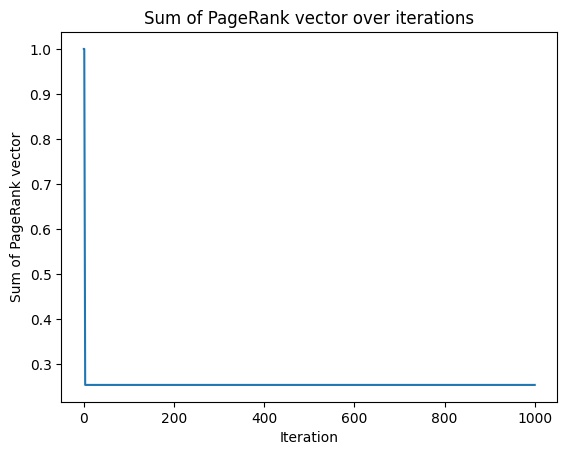

In [28]:
import matplotlib.pyplot as plt

plt.plot(norms)
plt.title("Sum of PageRank vector over iterations")
plt.xlabel("Iteration")
plt.ylabel("Sum of PageRank vector")
plt.show()